In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import seaborn as sns
import geopandas as gpd
import rioxarray
import matplotlib as mpl
import cartopy.crs as ccrs
from matplotlib.lines import Line2D
import cartopy.feature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import matplotlib.ticker as mticker
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colors import TwoSlopeNorm
import xarray as xr
import matplotlib.colors as colors
from cmcrameri import cm


In [3]:
ibge = gpd.read_file(r'Data\IBGE\BiomasBrasil.shp')
shp_cerrado = ibge[ibge.biomas == 'CERRADO']
hue_order = ['Central', 'Southern','Eastern']
ds_knn = xr.open_dataset(r'Data\knn_cerrado3.nc')
ds_knn.rio.write_crs(shp_cerrado.crs, inplace=True)
regions = gpd.read_file(r'Data\regions1.geojson')
gdf_knn = gpd.read_file('Data\gdf_knn_bet.geojson')
df_cerrado = pd.read_pickle('Data\df_cerrado_bet.pkl')
palette = sns.color_palette('cmc.batlow', 3)
gdf_inmet_clim = gpd.read_file(r'Data\Inmet\gdf_inmet_clim.geojson')
mapbiomas = pd.read_csv('Data\Mapbiomas\LUC_areas.csv', index_col=0)
gdf_knn.rename(columns={'map':'MAP'}, inplace=True)
my_proj = ccrs.PlateCarree()

In [5]:
#ignore warnings
import warnings
warnings.filterwarnings('ignore')

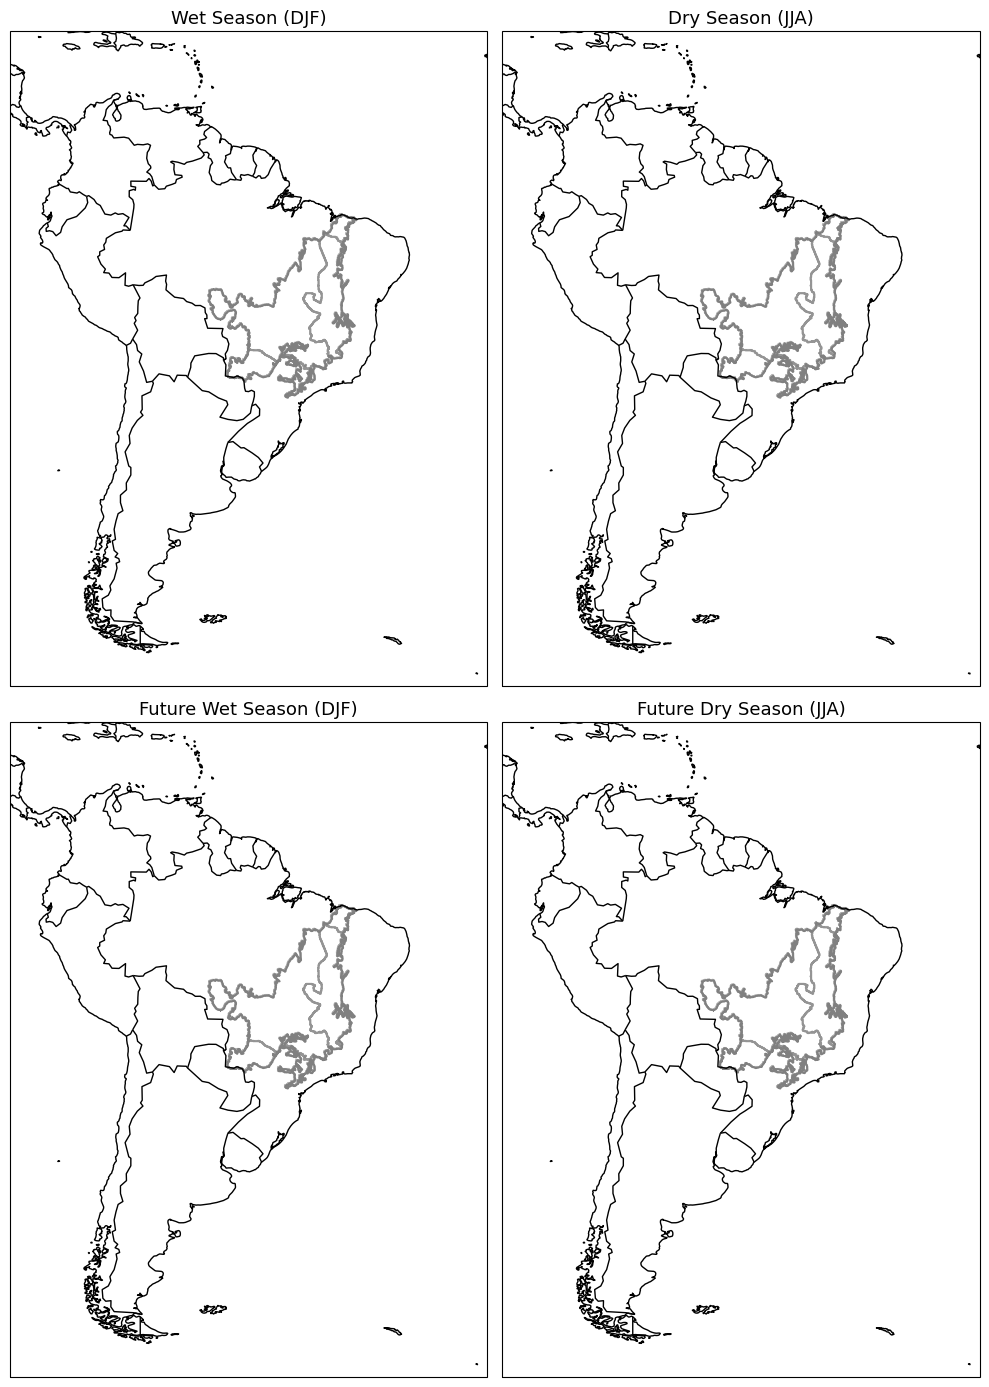

In [30]:

#plot stations
fig, axs = plt.subplots(2,2, figsize=[10,14], subplot_kw={"projection": my_proj})
fs = 13

for ax in axs.flatten():
    shp_cerrado.plot(ax=ax, color='white', edgecolor='grey', linewidth=1.5)
    regions.plot( color='none', edgecolor='grey', linewidth=1.5, ax=ax, alpha=0.6)

    ax.xaxis.set_major_formatter(LONGITUDE_FORMATTER)
    ax.yaxis.set_major_formatter(LATITUDE_FORMATTER)
    ax.coastlines(resolution="50m", linewidth=1, color='black')
    ax.add_feature(cartopy.feature.BORDERS, linewidth=1, color='black')
    ## x ticks 5 by 5 degrees    
    ax.set_extent([-85, -25, -60, 20], crs=my_proj)


axs[0,0].set_title('Wet Season (DJF)', fontsize=fs)
axs[0,1].set_title('Dry Season (JJA)', fontsize=fs)
axs[1,1].set_title('Future Dry Season (JJA)', fontsize=fs)
axs[1,0].set_title('Future Wet Season (DJF)', fontsize=fs)
#plot a line from amazon to south as Low level jet
#axs[0,0].plot([-60, -40], [-5, -25], color='black', linewidth=2, transform=ccrs.PlateCarree())

plt.tight_layout()